In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import scipy.stats
import numpy as np
%matplotlib inline

In [270]:
sns.set_context('paper',font_scale=2)

In [2]:
df = pd.read_csv('orderedOnetSkillsByComputerization.csv')

In [3]:
df.head()

,Unnamed: 0,Skill,correlation
0,136,Originality,-0.584977
1,72,Fluency of Ideas,-0.579859
2,204,Systems Evaluation,-0.565116
3,154,Provide Consultation and Advice to Others,-0.549661
4,37,Developing Objectives and Strategies,-0.545076


## Frey-Osbourne for jobs

In [4]:
df = pd.read_csv('game_data/probOfCompByOccupation2.csv')

In [5]:
df.head()

,Rank,Probability,Label,SOC,Occupation
0,1,0.0028,-1,29-1125,Recreational Therapists
1,2,0.0030,-1,49-1011,First-Line Supervisors of Mechanics Installers...
2,3,0.0030,-1,11-9161,Emergency Management Directors
3,4,0.0031,-1,21-1023,Mental Health and Substance Abuse Social Workers
4,5,0.0033,-1,29-1181,Audiologists


In [41]:
df['SOC'] = df['SOC'].astype(str)

In [50]:
df.set_index(df['SOC'],inplace=True)

## Work Values

In [6]:
independenceDf = pd.read_csv('work_values_data/Independence.csv')

In [7]:
independenceDf.head()

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Work Value,Second Work Value,Third Work Value
0,39-3091.00,Amusement and Recreation Attendants,1,Support,Independence,Relationships
1,35-2011.00,"Cooks, Fast Food",1,Relationships,Support,Independence
2,41-2021.00,Counter and Rental Clerks,1,Relationships,Support,Independence
3,35-9011.00,Dining Room and Cafeteria Attendants and Barte...,1,Relationships,Support,Independence
4,35-9021.00,Dishwashers,1,Relationships,Support,Independence


In [86]:
independenceDf['SOC'] = independenceDf['O*NET-SOC Code'].apply(lambda x:str(x[0:-3]))

In [87]:
independenceDf.set_index(independenceDf['SOC'],inplace=True)

## Job Zone (Education Level)

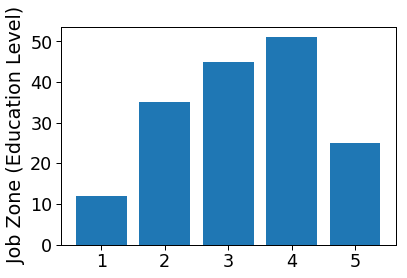

In [406]:
plt.bar(range(1,6),list(collections.Counter(independenceDf['Job Zone']).values()))
_ = plt.ylabel('Job Zone (Education Level)')

In [408]:
allJobZoneDf = pd.read_csv('All_Job_Zones.csv')

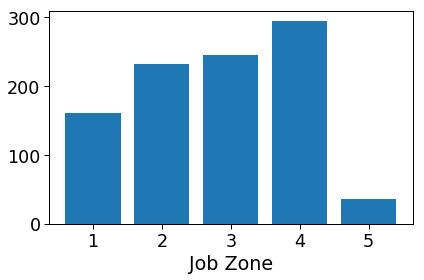

In [412]:
plt.bar(range(1,6),list(collections.Counter(allJobZoneDf['Job Zone']).values()))
_ = plt.xlabel('Job Zone')

plt.tight_layout()

plt.savefig('figures/job_zone_all.png',dpi=300)

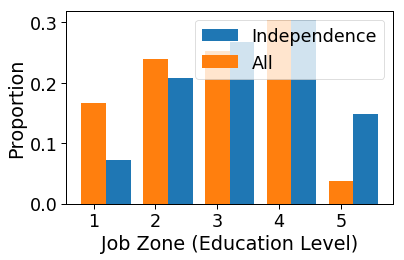

In [275]:
fig, ax = plt.subplots()
ax.bar([r+0.4 for r in range(1,6)],[l/float(independenceDf.shape[0]) \
                for l in list(collections.Counter(independenceDf['Job Zone']).values())],0.4,label = 'Independence')
ax.bar(range(1,6),[l/float(allJobZoneDf.shape[0]) \
                for l in list(collections.Counter(allJobZoneDf['Job Zone']).values())],0.4,label = 'All')
plt.legend()
_ = plt.xlabel('Job Zone (Education Level)')
_ = plt.ylabel('Proportion')

plt.tight_layout()

plt.savefig('figures/job_zone_independence.png',dpi = 300)

## Achievement

In [88]:
achievementDf = pd.read_csv('work_values_data/Achievement.csv')

In [89]:
achievementDf['SOC'] = achievementDf['O*NET-SOC Code'].apply(lambda x:str(x[0:-3]))

In [90]:
achievementDf.set_index(achievementDf['SOC'],inplace=True)

## Recognition

In [92]:
recogntitionDf = pd.read_csv('work_values_data/Recognition.csv')

In [93]:
recogntitionDf['SOC'] = recogntitionDf['O*NET-SOC Code'].apply(lambda x:str(x[0:-3]))

In [96]:
recogntitionDf.set_index(recogntitionDf['SOC'],inplace=True)

## Relationships

In [97]:
relationshipsDf = pd.read_csv('work_values_data/Relationships.csv')

In [98]:
relationshipsDf['SOC'] = relationshipsDf['O*NET-SOC Code'].apply(lambda x:str(x[0:-3]))

In [99]:
relationshipsDf.set_index(relationshipsDf['SOC'],inplace=True)

## Support

In [34]:
supportDf = pd.read_csv('work_values_data/Support.csv')

In [35]:
supportDf.head()

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Work Value,Second Work Value,Third Work Value
0,39-3091.00,Amusement and Recreation Attendants,1,Support,Independence,Relationships
1,53-6011.00,Bridge and Lock Tenders,1,Support,Relationships,Working Conditions
2,53-7011.00,Conveyor Operators and Tenders,1,Support,Relationships,Independence
3,47-5011.00,"Derrick Operators, Oil and Gas",1,Support,Relationships,Working Conditions
4,49-9093.00,"Fabric Menders, Except Garment",1,Support,Achievement,Working Conditions


In [36]:
supportDf.shape

(315, 6)

In [37]:
supportDf['SOC'] = supportDf['O*NET-SOC Code'].apply(lambda x:str(x[0:-3]))

In [51]:
supportDf.set_index(supportDf['SOC'],inplace=True)

## Working Conditions

In [108]:
workingConditionsDf = pd.read_csv('work_values_data/Working_Conditions.csv')

In [109]:
workingConditionsDf['SOC'] = workingConditionsDf['O*NET-SOC Code'].apply(lambda x:str(x[0:-3]))

In [110]:
workingConditionsDf.set_index(workingConditionsDf['SOC'],inplace=True)

## Toss out jobs with missing Job Zone values?

In [276]:
combined['Job Zone'].fillna(value = -1,inplace = True)

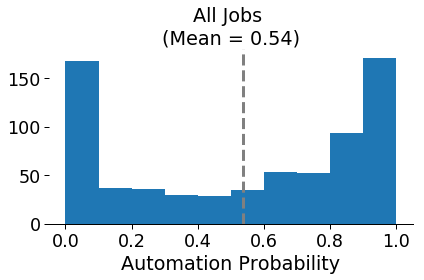

In [579]:
if False:
    subset = combined[pd.isna(combined['Job Zone'])]
else:
    subset = combined
    
fig, ax = plt.subplots()

ax.hist(df['Probability'],bins=np.linspace(0,1,11))

plt.axvline(np.mean(df['Probability']),linewidth=3,linestyle='--',color='grey')
#plt.annotate(s={.2f}.format(np.mean(combined[pd.isna(combined['Job Zone'])]['Probability'])),\
#             xy=(np.mean(combined[pd.isna(combined['Job Zone'])]['Probability']),100))

plt.title('All Jobs \n'+
'(Mean = {:.2})'.format(np.mean(df['Probability'])))
plt.xlabel('Automation Probability')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig('figures/automation_prob_overall.png',dpi=300)

In [577]:
combined = supportDf.join(df,on = 'SOC',lsuffix='s',how='outer')

In [391]:
def getSignificance(probs,ks = False):
    
    probs = probs.dropna()
    
    if ks:
        res = scipy.stats.ks_2samp(probs,df['Probability'])
    else:
        res = scipy.stats.ttest_ind(df['Probability'],probs)
        
    print(res)
    
    if res[1] <0.01:
        return '**'
    if res[1] <0.05:
        return '*'
    return ''

In [558]:
def getDirection(val1,val2):
    
    if val1 > val2:
        return '↑'
    else:
        return '↓'

Ttest_indResult(statistic=-7.767505006915125, pvalue=1.9855867150039488e-14)


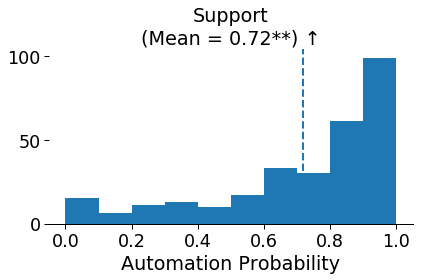

In [578]:
if True:
    subset = combined[~pd.isna(combined['Job Zone'])]
else:
    subset = combined

fig, ax = plt.subplots()
    
_ = ax.hist(subset['Probability'],bins=np.linspace(0,1,11))

plt.axvline(np.mean(subset['Probability']),linewidth=2,linestyle='--')

plt.title('Support\n'+\
         '(Mean = {:.2}{:s}) {:s}'.format(np.mean(subset['Probability']),getSignificance(subset['Probability']),\
         getDirection(np.mean(subset['Probability']),np.mean(df['Probability']))))

plt.xlabel('Automation Probability')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.spines['top'].set_visible(False)


plt.tight_layout()

plt.savefig('figures/automation_prob_support.png',dpi=300)

In [567]:
combined = achievementDf.join(df,on = 'SOC',lsuffix='s',how='outer')

/Users/alexisrutherford/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6336: FutureWarning: 'SOC' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  rsuffix=rsuffix, sort=sort)


Ttest_indResult(statistic=7.896697710707776, pvalue=8.873310599788366e-15)


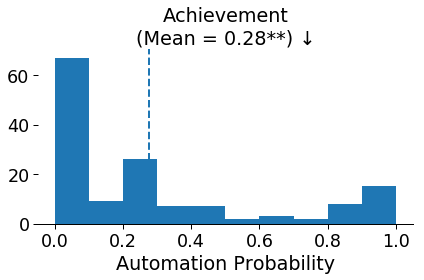

In [568]:
if True:
    subset = combined[~pd.isna(combined['Job Zone'])]
else:
    subset = combined

fig, ax = plt.subplots()

    
_ = ax.hist(subset['Probability'],bins=np.linspace(0,1,11))

plt.axvline(np.mean(subset['Probability']),linewidth=2,linestyle='--')

plt.title('Achievement\n'+\
'(Mean = {:.2}{:s}) {:s}'.format(np.mean(subset['Probability']),getSignificance(subset['Probability']),\
         getDirection(np.mean(subset['Probability']),np.mean(df['Probability']))))

plt.xlabel('Automation Probability')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()

plt.savefig('figures/automation_prob_achievement.png',dpi=300)

In [569]:
combined = recogntitionDf.join(df,on = 'SOC',lsuffix='s',how='outer')

Ttest_indResult(statistic=6.698804208383819, pvalue=4.113808039993141e-11)


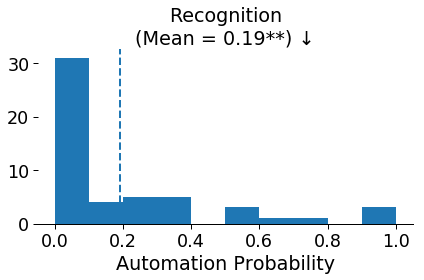

In [571]:

if True:
    subset = combined[~pd.isna(combined['Job Zone'])]
else:
    subset = combined

fig, ax = plt.subplots()
    
_ = ax.hist(subset['Probability'],bins=np.linspace(0,1,11))

plt.axvline(np.mean(subset['Probability']),linewidth=2,linestyle='--')

plt.title('Recognition\n'+\
'(Mean = {:.2}{:s}) {:s}'.format(np.mean(subset['Probability']),getSignificance(subset['Probability']),\
         getDirection(np.mean(subset['Probability']),np.mean(df['Probability']))))
plt.xlabel('Automation Probability')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()

plt.savefig('figures/automation_prob_recognition.png',dpi=300)

In [572]:
combined = independenceDf.join(df,on = 'SOC',lsuffix='s',how='outer')

Ttest_indResult(statistic=2.5884038581718043, pvalue=0.009805325845354913)


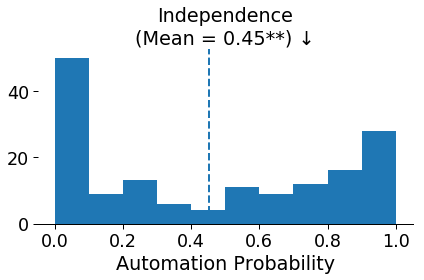

In [573]:
if True:
    subset = combined[~pd.isna(combined['Job Zone'])]
else:
    subset = combined

fig, ax = plt.subplots()

    
_ = ax.hist(subset['Probability'],bins=np.linspace(0,1,11))

plt.axvline(np.mean(subset['Probability']),linewidth=2,linestyle='--')

plt.title('Independence\n'+\
'(Mean = {:.2}{:s}) {:s}'.format(np.mean(subset['Probability']),getSignificance(subset['Probability']),\
         getDirection(np.mean(subset['Probability']),np.mean(df['Probability']))))
plt.xlabel('Automation Probability')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()

plt.savefig('figures/automation_prob_independence.png',dpi=300)

In [401]:
combined = relationshipsDf.join(df,on = 'SOC',lsuffix='s',how='outer')

Ttest_indResult(statistic=2.5884038581718043, pvalue=0.009805325845354913)


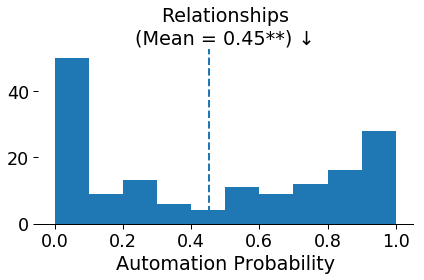

In [574]:
if True:
    subset = combined[~pd.isna(combined['Job Zone'])]
else:
    subset = combined

fig, ax = plt.subplots()

    
_ = ax.hist(subset['Probability'],bins=np.linspace(0,1,11))

plt.axvline(np.mean(subset['Probability']),linewidth=2,linestyle='--')

plt.title('Relationships\n'+\
'(Mean = {:.2}{:s}) {:s}'.format(np.mean(subset['Probability']),getSignificance(subset['Probability']),\
         getDirection(np.mean(subset['Probability']),np.mean(df['Probability']))))
plt.xlabel('Automation Probability')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()

plt.savefig('figures/automation_prob_relationships.png',dpi=300)

In [575]:
combined = workingConditionsDf.join(df,on = 'SOC',lsuffix='s',how='outer')

Ttest_indResult(statistic=1.1757129012703236, pvalue=0.24006426346384346)


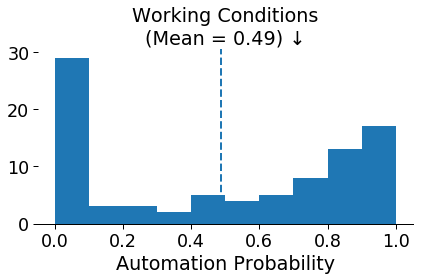

In [576]:
if True:
    subset = combined[~pd.isna(combined['Job Zone'])]
else:
    subset = combined

fig, ax = plt.subplots()

    
_ = ax.hist(subset['Probability'],bins=np.linspace(0,1,11))

plt.axvline(np.mean(subset['Probability']),linewidth=2,linestyle='--')

plt.title('Working Conditions\n'+\
'(Mean = {:.2}{:s}) {:s}'.format(np.mean(subset['Probability']),getSignificance(subset['Probability']),\
         getDirection(np.mean(subset['Probability']),np.mean(df['Probability']))))
plt.xlabel('Automation Probability')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()

plt.savefig('figures/automation_prob_working_conditions.png',dpi=300)

Montage 

```montage automation_prob_overall.png null: automation_prob_achievement.png automation_prob_independence.png automation_prob_recognition.png automation_prob_relationships.png automation_prob_support.png automation_prob_working_conditions.png -geometry +1+1 -tile 2x4 out.png```

## Are Frey-Osbourne Predictable?

In [405]:
combined['support'] = combined.apply(lambda x:int('Support' in x.values[2:6]),axis=1)
combined['relationships'] = combined.apply(lambda x:int('Relationships' in x.values[2:6]),axis=1)
combined['working_conditions'] = combined.apply(lambda x:int('Working Conditions' in x.values[2:6]),axis=1)
combined['independence'] = combined.apply(lambda x:int('Independence' in x.values[2:6]),axis=1)
combined['achievement'] = combined.apply(lambda x:int('Achievement' in x.values[2:6]),axis=1)
combined['recognition'] = combined.apply(lambda x:int('Recognition' in x.values[2:6]),axis=1)

In [157]:
workValues = list(combined.columns[-6:])

In [136]:
combined.fillna(value = 0,inplace = True)
# Where work values are missing set to zero

In [137]:
combined.head(10)

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Work Value,Second Work Value,Third Work Value,SOCs,Rank,Probability,Label,SOC,Occupation,support,relationships,working_conditions,independence,achievement,recognition
SOC,,,,,,,,,,,,,,,,,,
53-6011,53-6011.00,Bridge and Lock Tenders,1.0,Support,Relationships,Working Conditions,53-6011,644.0,0.97,-1,53-6011,Bridge and Lock Tenders,1,1,1,0,0,0
35-3021,35-3021.00,"Combined Food Preparation and Serving Workers,...",1.0,Relationships,Support,Working Conditions,35-3021,571.0,0.92,-1,35-3021,Combined Food Preparation and Serving Workers ...,1,1,1,0,0,0
35-3022,35-3022.00,"Counter Attendants, Cafeteria, Food Concession...",1.0,Relationships,Support,Working Conditions,35-3022,632.0,0.96,-1,35-3022,Counter Attendants Cafeteria Food Concession a...,1,1,1,0,0,0
45-2092,45-2092.02,"Farmworkers and Laborers, Crop",1.0,Relationships,Support,Working Conditions,45-2092,0.0,0.00,0,0,0,1,1,1,0,0,0
35-2021,35-2021.00,Food Preparation Workers,1.0,Support,Relationships,Working Conditions,35-2021,508.0,0.87,-1,35-2021,Food Preparation Workers,1,1,1,0,0,0
35-3041,35-3041.00,"Food Servers, Nonrestaurant",1.0,Relationships,Support,Working Conditions,35-3041,492.0,0.86,-1,35-3041,Food Servers Nonrestaurant,1,1,1,0,0,0
45-2041,45-2041.00,"Graders and Sorters, Agricultural Products",1.0,Support,Working Conditions,Relationships,45-2041,274.0,0.41,-1,45-2041,Graders and Sorters Agricultural Products,1,1,1,0,0,0
47-3014,47-3014.00,"Helpers--Painters, Paperhangers, Plasterers, a...",1.0,Relationships,Support,Working Conditions,47-3014,603.0,0.94,-1,47-3014,Helpers–Painters Paperhangers Plasterers and S...,1,1,1,0,0,0
45-3021,45-3021.00,Hunters and Trappers,1.0,Independence,Working Conditions,Relationships,45-3021,425.0,0.77,0,45-3021,Hunters and Trappers,0,1,1,1,0,0


In [146]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

reg = linear_model.LinearRegression()

In [159]:
workValues+['Job Zone']

['support',
 'relationships',
 'working_conditions',
 'independence',
 'achievement',
 'recognition',
 'Job Zone']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(combined[workValues], combined['Probability']\
                                                    , test_size=0.2, random_state=0)

In [164]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
reg.score(X_test,y_test)

0.006944274470771505

In [150]:
reg.coef_

array([ 0.28476772, -0.01593159, -0.12548551, -0.26616442, -0.07334202,
       -0.18030069])

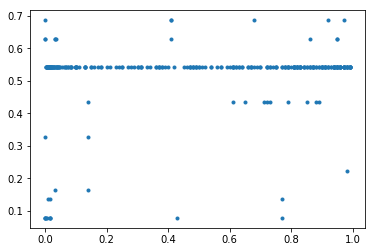

In [152]:
plt.plot(y_test,reg.predict(X_test),'.')

## All Job Zone Values

In [199]:
import re

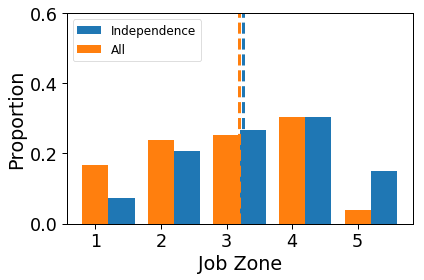

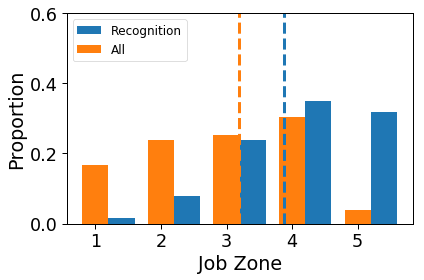

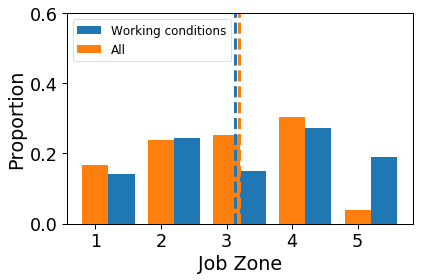

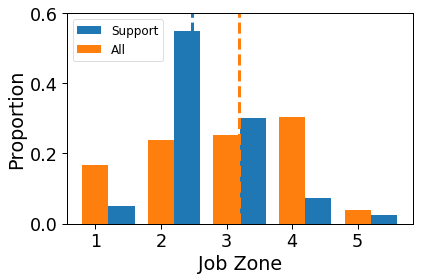

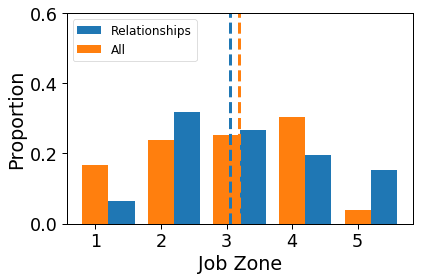

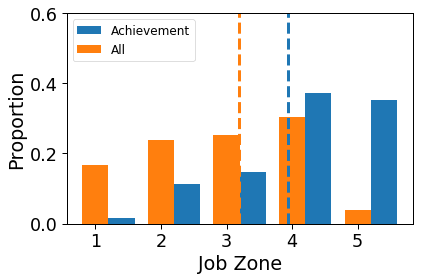

In [424]:
for name,dummyDf in zip(['independence','recognition','working conditions','support','relationships','achievement'],\
            [independenceDf,recogntitionDf,workingConditionsDf,supportDf,relationshipsDf,achievementDf]):

    fig, ax = plt.subplots()
    ax.bar([r+0.4 for r in range(1,6)],[l/float(dummyDf.shape[0]) \
                    for l in list(collections.Counter(dummyDf['Job Zone']).values())],0.4,label = str.capitalize(name))
    ax.bar(range(1,6),[l/float(allJobZoneDf.shape[0]) \
                    for l in list(collections.Counter(allJobZoneDf['Job Zone']).values())],0.4,label = 'All')
    plt.legend(loc='upper left',fontsize=12)
    _ = plt.xlabel('Job Zone')
    _ = plt.ylabel('Proportion')
    
    plt.ylim(0,0.6)
    
    plt.axvline(dummyDf['Job Zone'].mean(),linestyle='--',linewidth=3)
    plt.axvline(allJobZoneDf['Job Zone'].mean(),linestyle='--',color=sns.color_palette()[1],linewidth=3)
    
    plt.tight_layout()

    plt.savefig('figures/job_zone_{}.png'.format(re.sub(' ','_',name)),dpi = 300)

montage job_zone_achievement.png job_zone_independence.png job_zone_recognition.png job_zone_relationships.png job_zone_support.png job_zone_working_conditions.png -geometry +1+1 -tile 2x3 out_job_zone.png

## Job Network

In [425]:
import json

In [426]:
with open('game_data/jobNetwork.json') as inFile:
    d = json.load(inFile)

In [428]:
d['0']

['185', '266', '325', '408', '438', '537']

In [435]:
! mv /Users/alexisrutherford/Downloads/jobJobSkillSims\ \(1\).tsv game_data/

In [437]:
jobJobDf = pd.read_csv('game_data/jobJobSkillSims (1).tsv',sep = '\t')

In [440]:
jobJobDf.set_index('SOC 1',inplace=True)

In [474]:
jobJobDf['SOC 1'] = jobJobDf.index

In [475]:
jobJobDf.head()

,Title 1,SOC 2,Title 2,Skill Sim,assort,SOC 1
SOC 1,,,,,,
13-2011,accountants and auditors,27-2011,actors,0.454545,False,13-2011
13-2011,accountants and auditors,15-2011,actuaries,0.826087,False,13-2011
13-2011,accountants and auditors,51-9191,adhesive bonding machine operators and tenders,0.052632,False,13-2011
13-2011,accountants and auditors,23-1021,"administrative law judges, adjudicators, and h...",0.533333,False,13-2011
13-2011,accountants and auditors,11-3011,administrative services managers,0.633588,False,13-2011


In [439]:
supportDf.head()

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Work Value,Second Work Value,Third Work Value,SOC
SOC,,,,,,,
39-3091,39-3091.00,Amusement and Recreation Attendants,1,Support,Independence,Relationships,39-3091
53-6011,53-6011.00,Bridge and Lock Tenders,1,Support,Relationships,Working Conditions,53-6011
53-7011,53-7011.00,Conveyor Operators and Tenders,1,Support,Relationships,Independence,53-7011
47-5011,47-5011.00,"Derrick Operators, Oil and Gas",1,Support,Relationships,Working Conditions,47-5011
49-9093,49-9093.00,"Fabric Menders, Except Garment",1,Support,Achievement,Working Conditions,49-9093


In [446]:
supportDf.tail()

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Work Value,Second Work Value,Third Work Value,SOC
SOC,,,,,,,
25-1191,25-1191.00,Graduate Teaching Assistants,5,Achievement,Independence,Support,25-1191
23-1012,23-1012.00,Judicial Law Clerks,5,Achievement,Working Conditions,Support,23-1012
29-1151,29-1151.00,Nurse Anesthetists,5,Support,Relationships,Achievement,29-1151
29-1051,29-1051.00,Pharmacists,5,Recognition,Support,Relationships,29-1051
21-1015,21-1015.00,Rehabilitation Counselors,5,Relationships,Achievement,Support,21-1015


In [447]:
jobJobDf.shape

(294528, 4)

In [516]:
def bothHasValue(line,valueDf):
    if line[1] in valueDf.index and line[5] in valueDf.index:
        return True
    else:
        return False

In [461]:
jobJobDf.head()

,Title 1,SOC 2,Title 2,Skill Sim,assort
SOC 1,,,,,
13-2011,accountants and auditors,27-2011,actors,0.454545,False
13-2011,accountants and auditors,15-2011,actuaries,0.826087,False
13-2011,accountants and auditors,51-9191,adhesive bonding machine operators and tenders,0.052632,False
13-2011,accountants and auditors,23-1021,"administrative law judges, adjudicators, and h...",0.533333,False
13-2011,accountants and auditors,11-3011,administrative services managers,0.633588,False


10878 job pairs are achievement assortative (3.69%)
ratio = 2.29
11325 job pairs are independence assortative (3.85%)
ratio = 1.49
1225 job pairs are recognition assortative (0.42%)
ratio = 1.94
29890 job pairs are relationships assortative (10.15%)
ratio = 1.41
43660 job pairs are support assortative (14.82%)
ratio = 1.36
4950 job pairs are working conditions assortative (1.68%)
ratio = 1.36


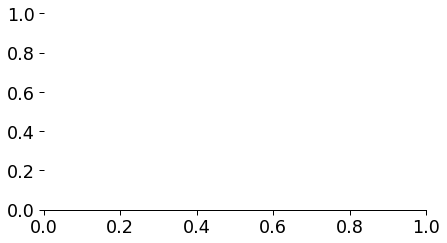

In [542]:
for dummyDf,name in zip([achievementDf,independenceDf,recogntitionDf,relationshipsDf,supportDf,workingConditionsDf],\
        ['achievement','independence','recognition','relationships','support','working conditions']):
    
    jobJobDf['assort'] = jobJobDf.apply(bothHasValue,axis = 1,valueDf = dummyDf)
    
    prop = float(jobJobDf['assort'].sum())/jobJobDf.shape[0]
    
    print('{:d} job pairs are {:s} assortative ({:.2f}%)'.format(jobJobDf['assort'].sum(),name,\
                                            100*prop))
    
    expected = dummyDf.shape[0]
    
    print('ratio = {:.2f}'.format(((expected/df.shape[0])**2)/prop))
    
    ax = sns.kdeplot(jobJobDf[jobJobDf['assort']]['Skill Sim'],legend = False,linewidth = 3)

    plt.axvline(jobJobDf[jobJobDf['assort']]['Skill Sim'].mean(),linestyle='--',linewidth=3)
    plt.axvline(jobJobDf['Skill Sim'].mean(),linestyle='--',linewidth=3,color='grey')
    
    plt.title('{:s}'.format(str.capitalize(name)))
    _ = plt.xlim(0,1)

    _ = plt.xlabel('Similarity')
    
    plt.yticks([],[])
    
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    
    plt.savefig('figures/assort_{:s}.png'.format(re.sub(' ','_',name)),dpi=300)
    
    plt.cla()
    

```montage assort_* -geometry +1+1 -tile 2x3 out_assort.png```

## Projections

In [609]:
projectionsDf = pd.read_excel('occupation.xlsx',sheet_name='Table 1.2')

In [610]:
projectionsDf.head(15)

,"Table 1.2 Employment by detailed occupation, 2016 and projected 2026 (Numbers in thousands)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2016 National Employment Matrix title and code,NaN,Occupation type,Employment,NaN,NaN,NaN,"Change, 2016-26",NaN,"Occupational openings, 2016-26 annual average"
1,NaN,NaN,NaN,Number,NaN,Percent distribution,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2016,2026.0,2016,2026.0,Number,Percent,NaN
3,"Total, all occupations",00-0000,Summary,156064,167582.3,100,100.0,11518.6,7.4,18742
4,Management occupations,11-0000,Summary,9533.1,10340.4,6.1,6.2,807.3,8.5,841.5
5,Top executives,11-1000,Summary,2627.5,2824.5,1.7,1.7,197,7.5,235
6,Chief executives,11-1011,Line item,308.9,296.8,0.2,0.2,-12.1,-3.9,20
7,General and operations managers,11-1021,Line item,2263.1,2468.3,1.5,1.5,205.2,9.1,210.7
8,Legislators,11-1031,Line item,55.5,59.4,0,0.0,3.9,7.1,4.4
9,"Advertising, marketing, promotions, public rel...",11-2000,Summary,708.6,768.9,0.5,0.5,60.3,8.5,67.9


In [611]:
projectionsDf.columns = ['job','job_code','occupation_type','2016','2026','2016_dist','2026_dist','number_change',\
                        'percent_change','average']

In [612]:
projectionsDf = projectionsDf[projectionsDf['occupation_type']=='Line item']

In [613]:
projectionsDf.head()

,job,job_code,occupation_type,2016,2026,2016_dist,2026_dist,number_change,percent_change,average
6,Chief executives,11-1011,Line item,308.9,296.8,0.2,0.2,-12.1,-3.9,20
7,General and operations managers,11-1021,Line item,2263.1,2468.3,1.5,1.5,205.2,9.1,210.7
8,Legislators,11-1031,Line item,55.5,59.4,0,0.0,3.9,7.1,4.4
10,Advertising and promotions managers,11-2011,Line item,31.3,33.0,0,0.0,1.7,5.5,3.4
12,Marketing managers,11-2021,Line item,218.3,240.4,0.1,0.1,22.1,10.1,21.3


In [614]:
projectionsDf['SOC'] = projectionsDf['job_code']

In [618]:
projectionsDf.set_index('SOC',inplace=True)

In [619]:
projectionsDf.head()

,job,occupation_type,2016,2026,2016_dist,2026_dist,number_change,percent_change,average
SOC,,,,,,,,,
11-1011,Chief executives,Line item,308.9,296.8,0.2,0.2,-12.1,-3.9,20
11-1021,General and operations managers,Line item,2263.1,2468.3,1.5,1.5,205.2,9.1,210.7
11-1031,Legislators,Line item,55.5,59.4,0,0.0,3.9,7.1,4.4
11-2011,Advertising and promotions managers,Line item,31.3,33.0,0,0.0,1.7,5.5,3.4
11-2021,Marketing managers,Line item,218.3,240.4,0.1,0.1,22.1,10.1,21.3


In [617]:
supportDf.head()

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Work Value,Second Work Value,Third Work Value,SOC
SOC,,,,,,,
39-3091,39-3091.00,Amusement and Recreation Attendants,1,Support,Independence,Relationships,39-3091
53-6011,53-6011.00,Bridge and Lock Tenders,1,Support,Relationships,Working Conditions,53-6011
53-7011,53-7011.00,Conveyor Operators and Tenders,1,Support,Relationships,Independence,53-7011
47-5011,47-5011.00,"Derrick Operators, Oil and Gas",1,Support,Relationships,Working Conditions,47-5011
49-9093,49-9093.00,"Fabric Menders, Except Garment",1,Support,Achievement,Working Conditions,49-9093


In [621]:
joined = supportDf.join(projectionsDf)

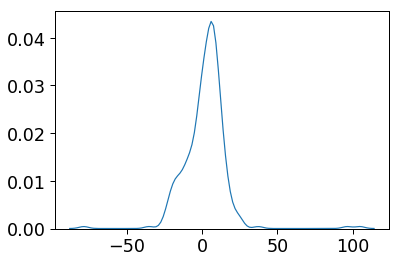

In [623]:
sns.kdeplot(joined['percent_change'],legend = False)

/Users/alexisrutherford/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/alexisrutherford/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/alexisrutherford/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


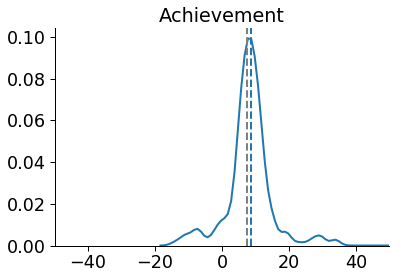

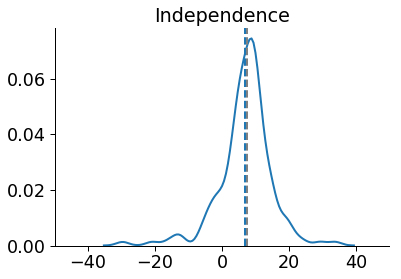

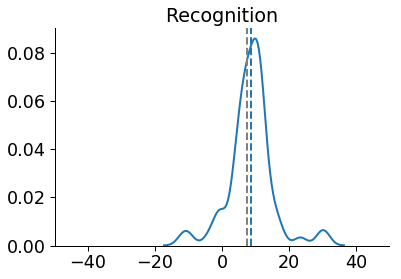

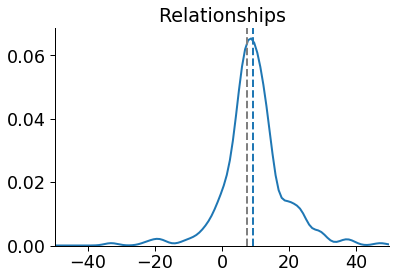

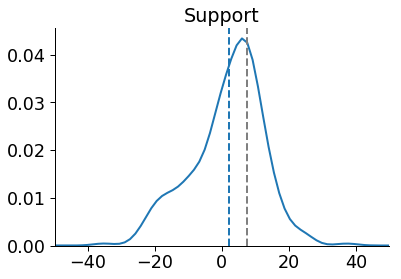

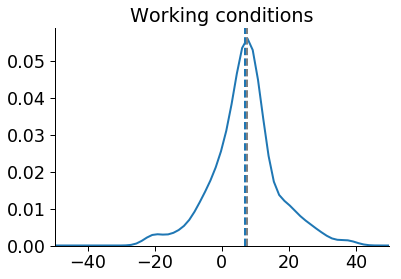

In [653]:
for dummyDf,name in zip([achievementDf,independenceDf,recogntitionDf,relationshipsDf,supportDf,workingConditionsDf],\
        ['achievement','independence','recognition','relationships','support','working conditions']):

    joined = dummyDf.join(projectionsDf)
    
    ax = sns.kdeplot(joined['percent_change'],legend = False,linewidth = 2)

    plt.axvline(joined['percent_change'].mean(),linewidth=2,linestyle='--')

    plt.xlim(-50,50)

    plt.axvline(7.4,linewidth=2,linestyle='--',color='grey')
    
    ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    ax.spines['top'].set_visible(False)
    
    plt.title(str.capitalize(name))
    
    plt.show()
    

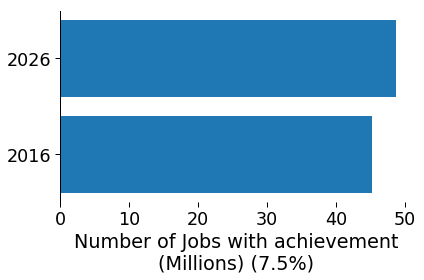

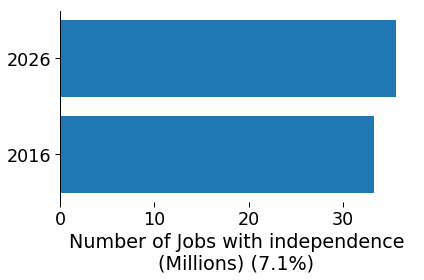

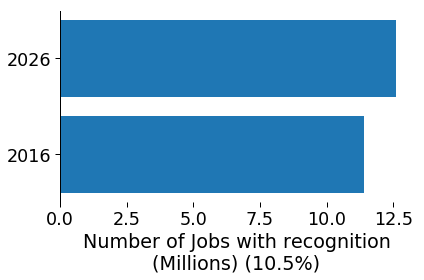

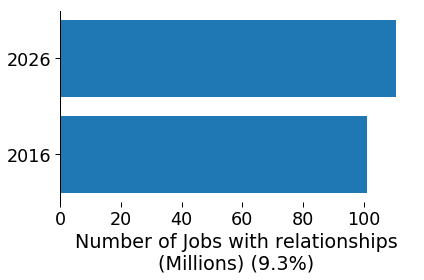

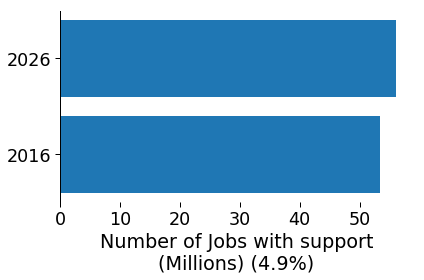

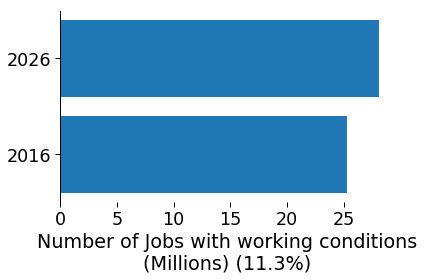

In [672]:
for dummyDf,name in zip([achievementDf,independenceDf,recogntitionDf,relationshipsDf,supportDf,workingConditionsDf],\
        ['achievement','independence','recognition','relationships','support','working conditions']):

    joined = dummyDf.join(projectionsDf)
    
    norm = 1000

    fig,ax = plt.subplots()

    ax.barh([0,1],[joined['2016'].sum()/norm,joined['2026'].sum()/norm])
    
    percent = (joined['2026'].sum() - joined['2016'].sum()) / float(joined['2016'].sum())
    
    percent = percent*100

    _ = plt.yticks([0,1],['2016','2026'])
    _ = plt.xlabel('Number of Jobs with {:s}\n(Millions) ({:.1f}%)'.format(name,percent))

    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.spines['top'].set_visible(False)
    
    plt.tight_layout()
    
    plt.savefig('figures/growth_{:s}.png'.format(re.sub(' ','_',name)),dpi = 300)
    
    plt.show()

In [635]:
joined.shape

(204, 16)

In [636]:
joined.head()

,O*NET-SOC Code,O*NET-SOC Title,Job Zone,First Work Value,Second Work Value,Third Work Value,SOC,job,occupation_type,2016,2026,2016_dist,2026_dist,number_change,percent_change,average
SOC,,,,,,,,,,,,,,,,
11-1011,11-1011.03,Chief Sustainability Officers,5,Achievement,Independence,Working Conditions,11-1011,Chief executives,Line item,308.9,296.8,0.2,0.2,-12.1,-3.9,20
11-3051,11-3051.06,Hydroelectric Production Managers,3,Achievement,Working Conditions,Recognition,11-3051,Industrial production managers,Line item,170.6,169.7,0.1,0.1,-0.9,-0.5,11.6
11-9013,11-9013.02,Farm and Ranch Managers,4,Achievement,Independence,Recognition,11-9013,"Farmers, ranchers, and other agricultural mana...",Line item,1028.7,1020.7,0.7,0.6,-8,-0.8,74.3
11-9041,11-9041.01,Biofuels/Biodiesel Technology and Product Deve...,4,Achievement,Working Conditions,Independence,11-9041,Architectural and engineering managers,Line item,180.1,190.0,0.1,0.1,9.9,5.5,13.6
11-9041,11-9041.00,Architectural and Engineering Managers,5,Achievement,Independence,Working Conditions,11-9041,Architectural and engineering managers,Line item,180.1,190.0,0.1,0.1,9.9,5.5,13.6


In [637]:
joined['2016'].sum()

45246.4

In [638]:
joined['2026'].sum()

48658.00000000001

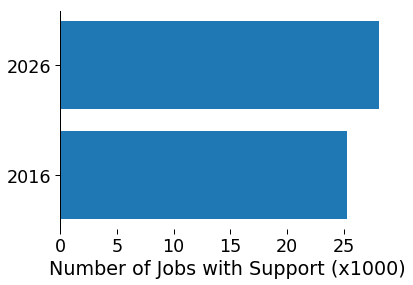

In [651]:
norm = 1000

fig,ax = plt.subplots()

ax.barh([0,1],[joined['2016'].sum()/norm,joined['2026'].sum()/norm])

_ = plt.yticks([0,1],['2016','2026'])
_ = plt.xlabel('Number of Jobs with Support (x1000)')

ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['top'].set_visible(False)

In [664]:
projectionsDf.head()

,job,occupation_type,2016,2026,2016_dist,2026_dist,number_change,percent_change,average
SOC,,,,,,,,,
11-1011,Chief executives,Line item,308.9,296.8,0.2,0.2,-12.1,-3.9,20
11-1021,General and operations managers,Line item,2263.1,2468.3,1.5,1.5,205.2,9.1,210.7
11-1031,Legislators,Line item,55.5,59.4,0,0.0,3.9,7.1,4.4
11-2011,Advertising and promotions managers,Line item,31.3,33.0,0,0.0,1.7,5.5,3.4
11-2021,Marketing managers,Line item,218.3,240.4,0.1,0.1,22.1,10.1,21.3


In [666]:
projectionsDf.query('percent_change<0.0')

,job,occupation_type,2016,2026,2016_dist,2026_dist,number_change,percent_change,average
SOC,,,,,,,,,
11-1011,Chief executives,Line item,308.9,296.8,0.2,0.2,-12.1,-3.9,20
11-3051,Industrial production managers,Line item,170.6,169.7,0.1,0.1,-0.9,-0.5,11.6
11-9013,"Farmers, ranchers, and other agricultural mana...",Line item,1028.7,1020.7,0.7,0.6,-8,-0.8,74.3
11-9131,Postmasters and mail superintendents,Line item,14.2,11.2,0,0.0,-3,-20.9,0.6
13-1021,"Buyers and purchasing agents, farm products",Line item,13.7,12.9,0,0.0,-0.9,-6.2,1.4
13-1022,"Wholesale and retail buyers, except farm products",Line item,123.3,120.3,0.1,0.1,-3,-2.5,13.3
13-1023,"Purchasing agents, except wholesale, retail, a...",Line item,309.4,292.1,0.2,0.2,-17.4,-5.6,23.8
13-1031,"Claims adjusters, examiners, and investigators",Line item,311.1,306.7,0.2,0.2,-4.5,-1.4,24.5
13-1075,Labor relations specialists,Line item,81.1,74.8,0.1,0.0,-6.3,-7.7,6.8
